# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [2]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [3]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


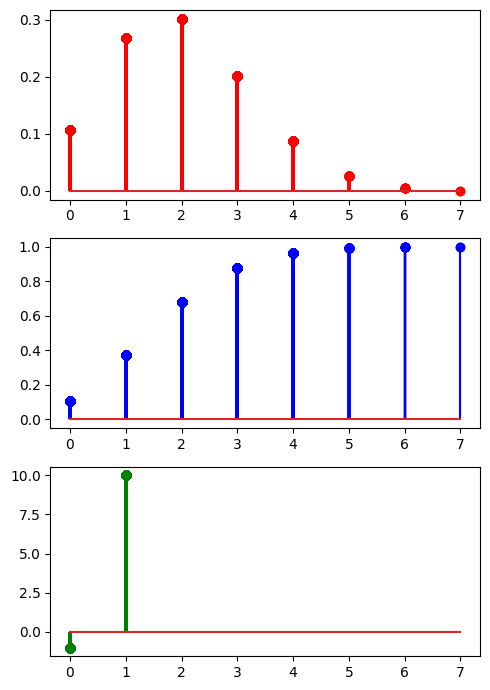

In [4]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

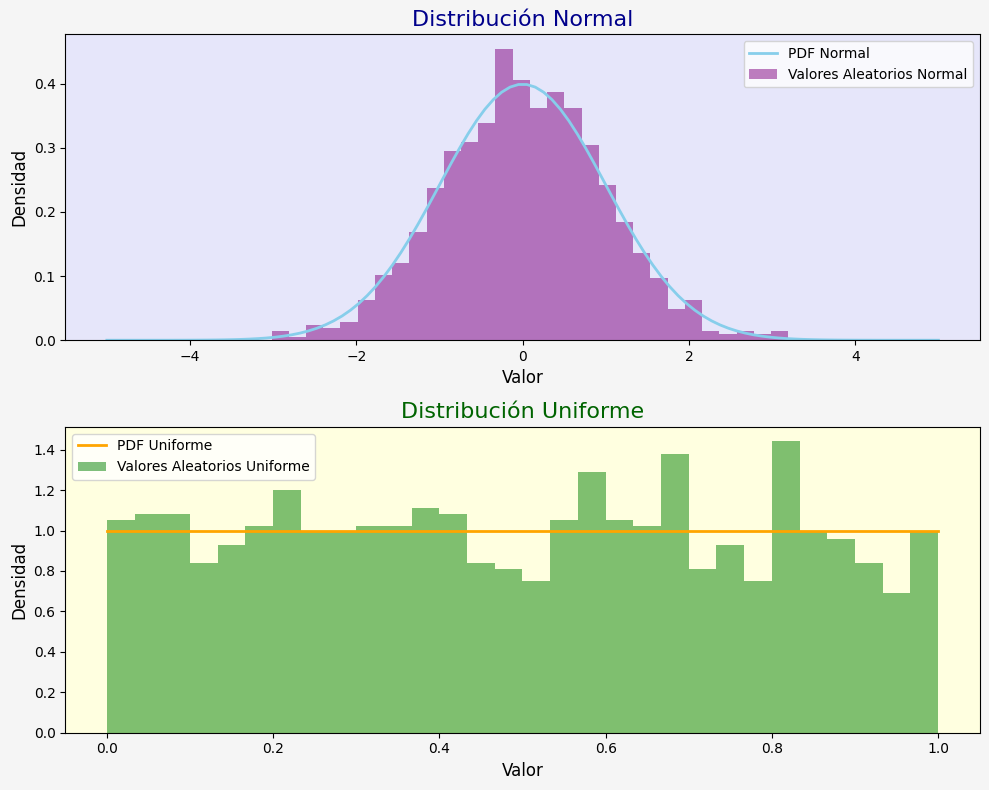

In [5]:
def dnorm(x, mean=0, std=1):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)
def pnorm(x, mean=0, std=1):
    return 0.5 * (1+ np.erf((x - mean) / (std * np.sqrt(2))))
def qnorm(p, mean=0, std=1):
    return mean + std * np.sqrt(2) * np.erfinv(2 * p -1)
def rnorm (n, mean=0, std=1):
    return np.random.normal(mean, std, n)

def dunif(x, min=0, max=1):
    return np.where((x>= min) & (x <=max), 1 / (max -min), 0)
def punif (x, min=0, max=1):
    return np.clip((x- min) /(max - min), 0, 1)
def qunif(p, min=0, max=1):
    return min + p (max - min)
def runif(n, min=0, max=1):
    return np.random.uniform(min, max, n)


x_normal = np.linspace(-5, 5, 100)
y_normal = dnorm(x_normal, mean=0, std=1)  

random_normal = rnorm(1000, mean=0, std=1)


x_uniform = np.linspace(0, 1, 100)
y_uniform = dunif(x_uniform, min=0, max=1) 
random_uniform = runif(1000, min=0, max=1)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(x_normal, y_normal, label="PDF Normal", color='skyblue', lw=2)  # Línea azul suave
ax[0].hist(random_normal, bins=30, density=True, alpha=0.5, color='purple', label="Valores Aleatorios Normal")  # Histograma morado
ax[0].set_title('Distribución Normal', fontsize=16, color='darkblue')  # Título azul oscuro
ax[0].set_xlabel('Valor', fontsize=12)
ax[0].set_ylabel('Densidad', fontsize=12)
ax[0].legend()

ax[1].plot(x_uniform, y_uniform, label="PDF Uniforme", color='orange', lw=2) 
ax[1].hist(random_uniform, bins=30, density=True, alpha=0.5, color='green', label="Valores Aleatorios Uniforme") 
ax[1].set_title('Distribución Uniforme', fontsize=16, color='darkgreen')  
ax[1].set_xlabel('Valor', fontsize=12)
ax[1].set_ylabel('Densidad', fontsize=12)
ax[1].legend()

fig.patch.set_facecolor('whitesmoke') 
ax[0].set_facecolor('lavender')  
ax[1].set_facecolor('lightyellow')  

plt.tight_layout()


plt.show()